In [212]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten , Dropout, BatchNormalization
from tensorflow.keras.models import load_model


In [213]:
data_dir = 'datasets'

In [214]:
images_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [215]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir , image_class)):
        image_path = os.path.join(data_dir , image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in images_exts:
                print(f"{image} doesnot exits in the extension")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with the image {image}")


Beagle
German_Shepherd
Golden_Retriever
Siberian_Husky


In [216]:
for image_class in os.listdir(data_dir):
    print(image_class)

Beagle
German_Shepherd
Golden_Retriever
Siberian_Husky


In [217]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        print(image)

00xp-beagles-AP-facebookJumbo-v2.jpg
2-Jahre-Beagle-768x512.jpg
4195-wMr6JS._SL500_.jpg
47e924f8d028974fa04275be6b8f185f.jpg
61.-Beagle.jpg
640px-Beagle_Upsy.jpg
67e6a3f1bf14516c30d2cdad0042e993.jpg
7dec9387a32071dbc7a3bcffdc08de89Y29udGVudHNlYXJjaGFwaSwxNjkyODkzNDA2-2.73426158.jpg
800px-Beagle_harrier.JPG.jpg
a8b50632a4f324c88fa11e310b027b1d.png
adorable-beagle-puppy-solo-portrait_53876-73998.jpg
Are-Beagles-Good-Dogs.jpg
Basset-Hound-vs-Beagle-1-.jpg
beagle-1.jpg
beagle-12.jpg
beagle-13.jpg
Beagle-2-1-1024x768.jpeg
beagle-2_custom-01105a795e7709dcb99ee953d438ef5ca4781622.jpg
beagle-5375285_1280.jpg
Beagle-breed-guide-1.jpg
beagle-card-large.jpg
Beagle-Dog-Breed-Image-1024x722.jpg
beagle-dog-breed-of-the-month-1619614746.jpg
beagle-dog-sitting-with-white-background_53876-30186.jpg
beagle-dog.jpg
Beagle-e1587511922360.jpg
Beagle-head-portrait-in-a-field-in-early-morning-500x486.jpg
beagle-head.png
beagle-hero-image-for-breed-page.jpg
Beagle-hound-dog-puppy.jpg
beagle-hound-dog.jpg
beag

In [218]:
data = tf.keras.utils.image_dataset_from_directory('datasets')

Found 477 files belonging to 4 classes.


In [219]:
data_iterator = data.as_numpy_iterator()

In [220]:
batch = data_iterator.next()

In [221]:
len(batch)

2

In [222]:
batch[0].shape

(32, 256, 256, 3)

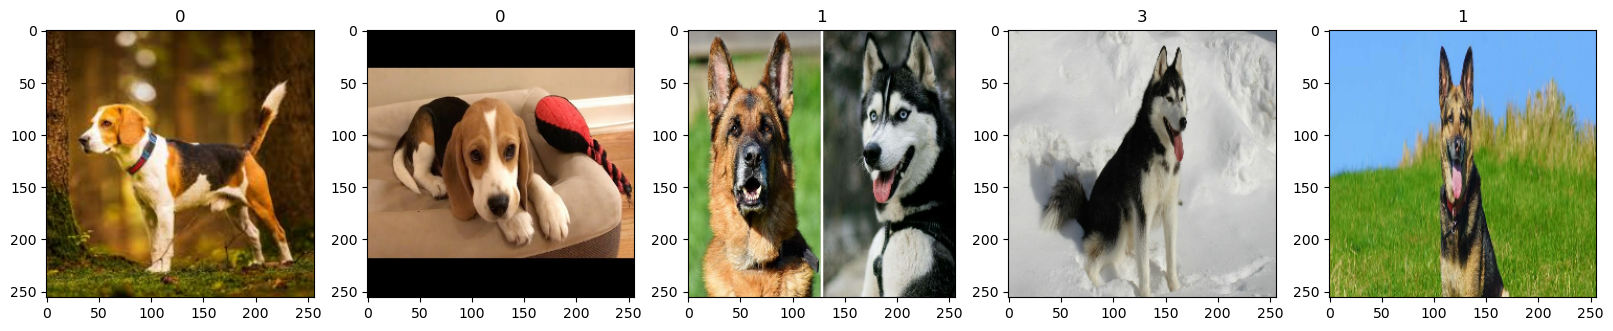

In [223]:
fig, ax = plt.subplots(ncols=5 , figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [224]:
# Beagle = 0
# GermanShepherd = 1
# GoldenRetriever = 2
# Husky = 3

In [225]:
data = data.map(lambda x,y : (x/255, y))

In [226]:
data.as_numpy_iterator().next()[0].min()

0.0

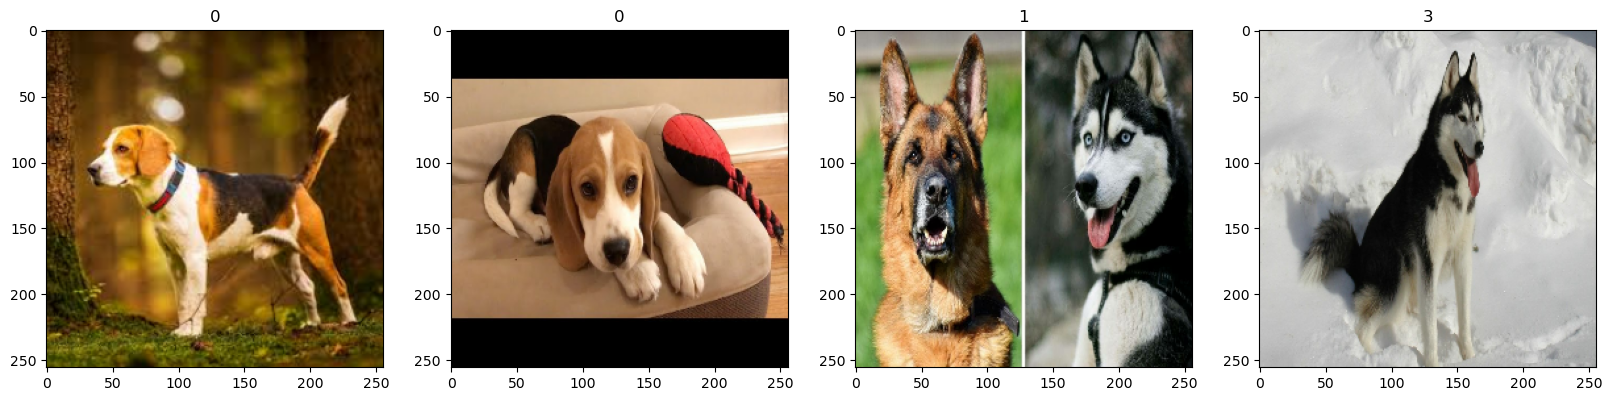

In [227]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [228]:
len(data)

15

In [231]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)

In [232]:
train_size + val_size + test_size

15

In [233]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [234]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [235]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [236]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 64)       

In [237]:
logdir = 'logs'


In [238]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [239]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25


9/9 [==============================] - 13s 1s/step - loss: 3.0739 - accuracy: 0.2812 - val_loss: 1.3613 - val_accuracy: 0.4062
Epoch 2/25
9/9 [==============================] - 12s 1s/step - loss: 1.3483 - accuracy: 0.2986 - val_loss: 1.2942 - val_accuracy: 0.3333
Epoch 3/25
9/9 [==============================] - 12s 1s/step - loss: 1.2710 - accuracy: 0.3924 - val_loss: 1.2334 - val_accuracy: 0.4062
Epoch 4/25
9/9 [==============================] - 12s 1s/step - loss: 1.1919 - accuracy: 0.5035 - val_loss: 1.0973 - val_accuracy: 0.5938
Epoch 5/25
9/9 [==============================] - 12s 1s/step - loss: 1.0466 - accuracy: 0.5938 - val_loss: 0.8976 - val_accuracy: 0.7188
Epoch 6/25
9/9 [==============================] - 12s 1s/step - loss: 0.8836 - accuracy: 0.6910 - val_loss: 0.8983 - val_accuracy: 0.6667
Epoch 7/25
9/9 [==============================] - 13s 1s/step - loss: 0.7385 - accuracy: 0.7292 - val_loss: 0.7673 - val_accuracy: 0.7292
Epoch 8/25
9/9 [=============================

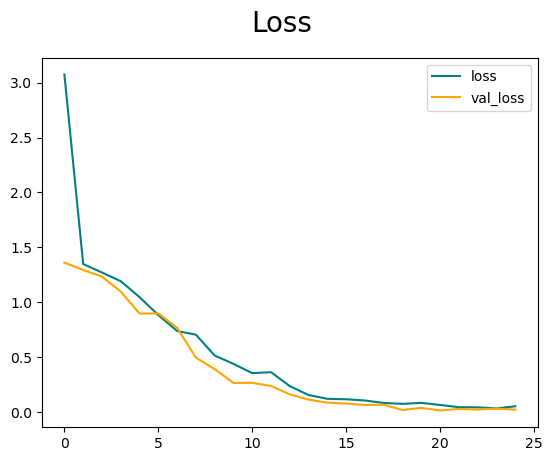

In [240]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

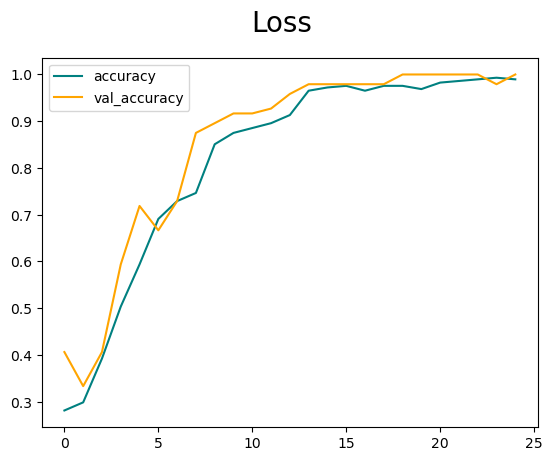

In [241]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [266]:
def predict(img_path):
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    max_index = np.argmax(yhat[0])

    if max_index == 0:
        print("beagle")
    elif max_index == 1:
        print("German Shepherd")
    elif max_index ==  2:
        predict("GoldenRetriever")
    else:
        print("Husky")


In [267]:
predict('german.png')

1/1 [==============================] - 0s 40ms/step
German Shepherd


In [268]:
predict('husk.jpg')

1/1 [==============================] - 0s 42ms/step
Husky


In [269]:
predict('beagle.jpg')

1/1 [==============================] - 0s 57ms/step
beagle


In [270]:
model.save(os.path.join('models', 'golden_trio.h5'))


c:\Users\Shivam\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
